In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
voxels_filepath = '/home/user/Documents/workspace/outputs/memory_tracking/voxelstrace_case_1_5_0_keep_Jul_15_2020_02:18:13.csv'
memory_filepath = '/home/user/Documents/workspace/outputs/memory_tracking/memorytrace_case_1_5_0_keep_Jul_15_2020_02:18:13.csv'

In [3]:
vox_data = pd.read_csv(voxels_filepath)
vox_data.head()

,nb_voxels
0,10718750
1,0
2,10718750
3,0
4,10718750


In [4]:
print(len(vox_data.index))

64


In [5]:
vox_data = vox_data.apply(lambda x: x*2/1000000, axis=1)
vox_data.head(15)

,nb_voxels
0,21.4375
1,0.0000
2,21.4375
3,0.0000
4,21.4375
5,0.0000
6,21.4375
7,0.0000
8,21.4375
9,0.0000


In [6]:
mem_data = pd.read_csv(memory_filepath)
mem_data.head()

,ram,swap
0,5006.300781,1.5
1,5025.410156,1.5
2,5025.410156,1.5
3,5025.410156,1.5
4,5025.410156,1.5


In [7]:
mem_data = mem_data.apply(np.round, axis=1)
mem_data.head()

,ram,swap
0,5006.0,2.0
1,5025.0,2.0
2,5025.0,2.0
3,5025.0,2.0
4,5025.0,2.0


In [8]:
start_ram = mem_data.iloc[0][0]
mem_data['ram'] = mem_data['ram'].apply(lambda x: x - start_ram)
mem_data.head()

,ram,swap
0,0.0,2.0
1,19.0,2.0
2,19.0,2.0
3,19.0,2.0
4,19.0,2.0


[Text(0, 0.5, 'RAM used (MB)'), Text(0.5, 0, 'time (5s interval)')]

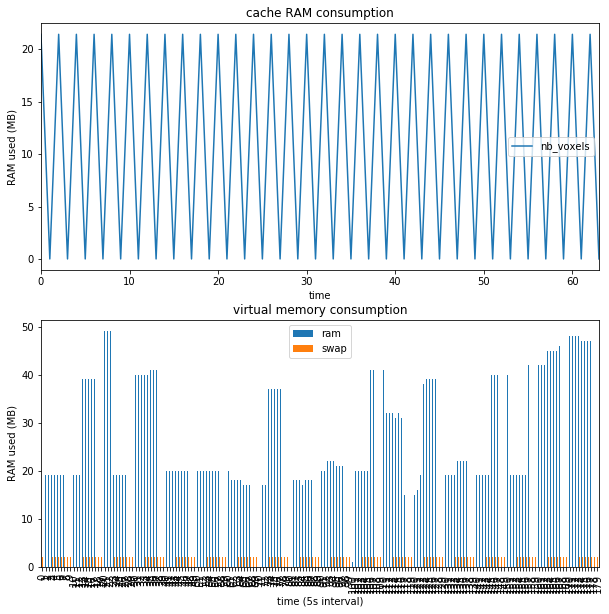

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True)
plt.subplot(2,1,1)
vox_data.plot(title='cache RAM consumption', ax=plt.gca())
plt.gca().set(xlabel='time', ylabel='RAM used (MB)')
mem_data.plot(title='virtual memory consumption', ax=axes[1], kind='bar')
axes[1].set(xlabel='time (5s interval)', ylabel='RAM used (MB)')